## 1. Business Problem Understanding

The hospitality industry faces significant challenges in managing bookings, cancellations, pricing strategies, and demand fluctuations. Understanding customer behavior is crucial for optimizing revenue, reducing cancellations, and enhancing customer satisfaction.

This analysis explores historical hotel booking data to uncover key patterns and trends. Additionally, we implement machine learning models to predict cancellations, forecast demand, segment customers, and optimize pricing strategies.

### 1.1. Problem Statement

Hotels face high cancellation rates, leading to:
-	Revenue loss due to cancellations.
-	Inefficient resource allocation (staff, room management).

Understanding cancellation behavior enables data-driven strategies for improved booking management.

### 1.2. Goals

This project aims to:
- Analyze factors influencing cancellations.
- Develop a predictive model to classify cancellations.
- Provide insights for hotels to minimize cancellations and improve revenue.

### 1.3. Analytical Approach

1 : Canceled (Yes) --> Positive

0 : Not Canceled (No) --> Negative

**The Impact of False Positive vs. False Negative in Hotel Booking Predictions**
When predicting hotel booking cancellations, a False Positive (incorrectly predicting a cancellation when the guest actually shows up) is more harmful than a False Negative (failing to predict a cancellation). This is because False Positives lead to unnecessary operational costs and customer dissatisfaction, which can negatively impact the hotel's revenue and reputation.

**Why False Positives Are More Costly:**
1. Higher Customer Acquisition Cost (CAC) – Losing a customer means spending more money to attract new ones.
2. Loss of Customer Lifetime Value (CLV) – A dissatisfied guest may never book again, reducing long-term revenue.

In the hospitality industry, overbooking carries risks, but it can be managed by offering compensation or alternative arrangements. However, losing loyal customers due to prediction errors can have long-term consequences. This is why reducing False Positives is essential to maintaining revenue and customer trust.

**Evaluating Model Performance**
Both False Positives and False Negatives impact revenue, but because False Positives cause greater losses, we need a balanced metric that prioritizes reducing False Positives. The F0.5 Score is ideal for this scenario.

What is the F0.5 Score?
The F0.5 Score helps minimize False Positives while still considering recall. It is a useful metric for evaluating hotel booking predictions, particularly when last-minute cancellations are a concern.

- A low F0.5 Score means the model is incorrectly predicting cancellations, leading to lost revenue and customer dissatisfaction.
- A high F0.5 Score indicates that the model is effectively reducing False Positives, improving precision while maintaining recall.

By optimizing the F0.5 Score, hotels can take proactive steps to retain customers, such as offering rebooking or rescheduling options. This helps maintain revenue and customer loyalty, making the prediction model a valuable tool for hotel management.

**Step 1: Exploratory Data Analysis (EDA)**

We will explore:
- Cancellation trends (seasonality, frequency).
- Influencing factors (lead time, deposit type, ADR, customer segment).
- Customer behavior (special requests, previous cancellations).

**Step 2: Machine Learning Model**

We will develop a classification model to predict whether a booking will be canceled.

Model Selection:
- Logistic Regression
- Decision Tree
- XGBoost
- Random Forest
- Light GBM

### 1.4. Evaluation Metrics

The model will be assessed using:
-	**Confusion Matrix** – To understand the distribution of True Positives, True Negatives, False Positives, and False Negatives.
-	**Accuracy** – Overall correctness of the model.
-	**Precision & Recall** – To balance false positives and false negatives.
-	**F0.5-score** – For a combined measure of precision and recall.


## 2. Library & Dataset Preparation

Data sourse: [kaggle/jessemostipak/hotel-booking-demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

In [2]:
import pandas as pd
import numpy as np

# Data Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Train-Test split and CrossVal
from sklearn.model_selection import GridSearchCV,StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import OneHotEncoder


# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# Transfrom & One-Hot Encoding
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder, BinaryEncoder


# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Metrics Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, recall_score, precision_score, precision_recall_curve, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

# Handling Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import joblib
import warnings
warnings.filterwarnings('ignore')

## 3. Data Understanding

The dataset consists of various features related to hotel bookings. Here’s a summary of the attributes:  

| **Attribute** | **Description** |
|--------------|----------------|
| `hotel` | Type of hotel: *City Hotel* or *Resort Hotel*. |
| `is_canceled` | Whether the booking was canceled (1) or not (0). |
| `lead_time` | Number of days between booking and check-in. |
| `arrival_date_year` | Year of arrival. |
| `arrival_date_month` | Month of arrival. |
| `arrival_date_week_number` | Week number of arrival. |
| `arrival_date_day_of_month` | Day of the month for arrival. |
| `stays_in_weekend_nights` | Number of weekend nights booked (Saturday/Sunday). |
| `stays_in_week_nights` | Number of weekday nights booked (Monday-Friday). |
| `adults` | Number of adults in the booking. |
| `children` | Number of children in the booking. |
| `babies` | Number of babies in the booking. |
| `meal` | Type of meal plan chosen. |
| `country` | Country of the guest (ISO country code). |
| `market_segment` | Booking source (Online, Offline, Corporate, etc.). |
| `distribution_channel` | Distribution channel used for booking. |
| `is_repeated_guest` | 1 if the guest has stayed before, 0 otherwise. |
| `previous_cancellations` | Number of previous cancellations by the guest. |
| `previous_bookings_not_canceled` | Number of previous successful bookings. |
| `reserved_room_type` | Room type booked by the guest. |
| `assigned_room_type` | Actual room type assigned. |
| `booking_changes` | Number of changes made to the booking. |
| `deposit_type` | Type of deposit: *No Deposit*, *Non Refundable*, or *Refundable*. |
| `agent` | ID of the travel agency handling the booking. |
| `company` | ID of the company making the booking (if applicable). |
| `days_in_waiting_list` | Number of days the booking was on the waiting list. |
| `customer_type` | Type of customer (Transient, Contract, etc.). |
| `adr` (Average Daily Rate) | Average price per night in Euros. |
| `required_car_parking_spaces` | Number of parking spaces requested. |
| `total_of_special_requests` | Number of special requests made. |
| `reservation_status` | Final status of the reservation (*Canceled*, *Check-Out*, *No-Show*). |
| `reservation_status_date` | Date when the reservation status was last updated. |

In [3]:
#Load Dataset
file_path = r'C:\hotel_bookings.csv'
df = pd.read_csv(file_path)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
pd.set_option('display.max_colwidth', 120)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
tabel_desc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Total Unique', 'Sampel Unique'],
                     data=listItem)
tabel_desc

,Nama Kolom,Jumlah Total Unique,Sampel Unique
0,hotel,2,"[Resort Hotel, City Hotel]"
1,is_canceled,2,"[0, 1]"
2,lead_time,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15..."
3,arrival_date_year,3,"[2015, 2016, 2017]"
4,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3..."
6,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 1..."
9,adults,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


## 4. Data Cleaning

### 4.1. Handling for Missing Values

To handle missing values, we apply the following strategies:  

- **`children` column** → Fill with `0` (since some bookings might only include adults).  
- **`country` column** → Fill with `"Unknown"` (as some entries might not have recorded the country).  
- **`agent` and `company` columns** → Fill with `0`, as they are IDs (where `0` means no agent/company was involved).  

In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

children         4
country        488
agent        16340
company     112593
dtype: int64


In [7]:
# Fill missing values without inplace=True to avoid warnings
df = df.assign(
    children=df['children'].fillna(0),
    country=df['country'].fillna('Unknown'),
    agent=df['agent'].fillna(0),
    company=df['company'].fillna(0)
)

# Confirm that there are no missing values left
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### 4.2. Handling Duplicate Data

In [8]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

# Confirm removal
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 31994
Number of duplicate rows after removal: 0


### 4.3. Handling Data Types

Some columns may have incorrect data types and need conversion:  

- **`reservation_status_date`** → Convert to `datetime`.  
- **`agent` and `company`** → Convert to `int` since they represent ID numbers.  

In [9]:
# Convert columns to appropriate data types
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)

# Confirm the changes
print(df.dtypes[['reservation_status_date', 'agent', 'company']])

reservation_status_date    datetime64[ns]
agent                               int32
company                             int32
dtype: object


### 4.4. Handling Outliers

Remove the outliers in ADR column with value more than 5000 EUR.

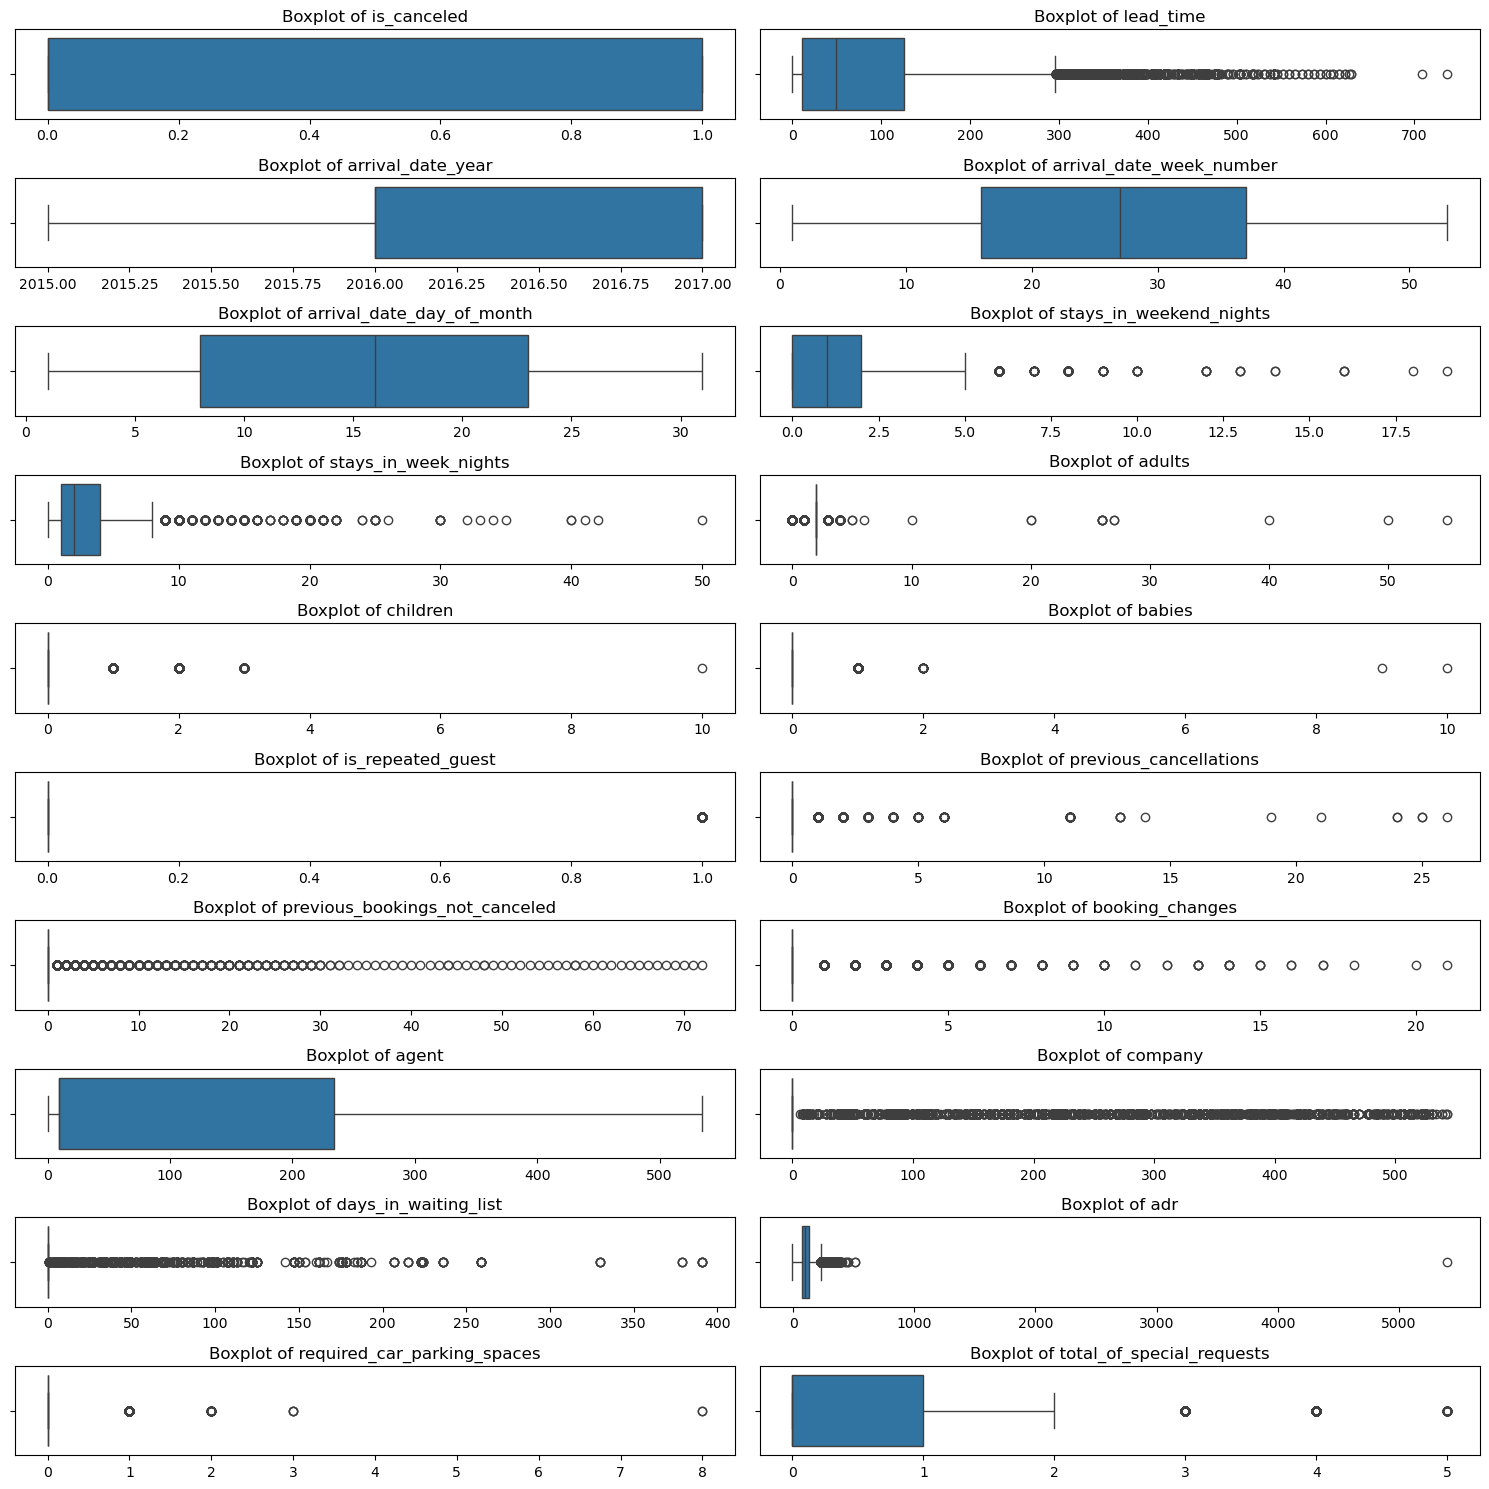

In [10]:
# Select only integer and float columns
num_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Set figure size
plt.figure(figsize=(15, 15))

# Create boxplots for each numeric column
for i, column in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 1) // 2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
plt.tight_layout()

plt.show()


In [11]:
# Remove outlier in ADR
df = df[df['adr']<1000]

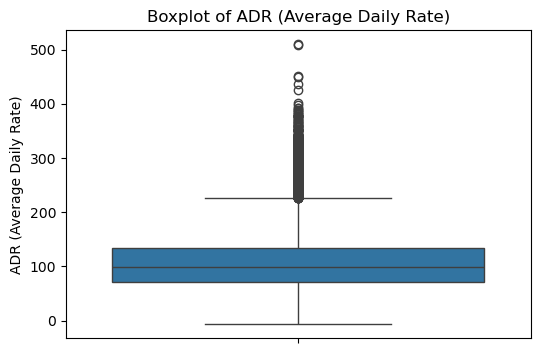

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['adr'])
plt.title('Boxplot of ADR (Average Daily Rate)')
plt.ylabel('ADR (Average Daily Rate)')
plt.show()

Removing outlier in `adr` with value above 1000 to ensures a more accurate and reliable dataset. These outlier can be caused by data entry errors, special cases, or unrealistic rates. Keeping them may distort analysis and negatively affect machine learning models.

- `ADR` (Average Daily Rate) majority values are cencentrated between 50 and 150.

### 4.5. Handling Invalid Values

Some data points may not make sense, such as:  

- `adults`, `children`, `babies` **= 0** → A booking should have at least one guest.  
- `adr` (Average Daily Rate) **negative values** → A nightly rate should not be negative.  

In [13]:
# Remove rows where total number of guests is 0
df = df[(df['adults'] + df['children'] + df['babies']) > 0]

# Remove rows where ADR is negative
df = df[df['adr'] >= 0]

# Confirm the number of rows after cleaning
print(f"Number of rows after cleaning: {len(df)}")

Number of rows after cleaning: 87228


## 5. Exploratory Data Analysis

### 5.1. Summary Statistics

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.00000,87228.000000,...,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228
mean,0.275233,79.970216,2016.210345,26.835443,15.815850,1.004586,2.623905,1.879362,0.13890,0.010845,...,0.030403,0.184035,0.268469,81.087850,10.985200,0.746309,106.458639,0.084308,0.698950,2016-08-31 02:54:20.751134976
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.00000,10.000000,...,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446634,86.058654,0.686066,13.669173,8.835516,1.027365,2.039814,0.621731,0.45627,0.113705,...,0.369349,1.733042,0.710612,109.976348,53.957261,10.001115,51.881832,0.281662,0.832054,NaN


### 5.2. Distribution of Bookings by Hotel Type

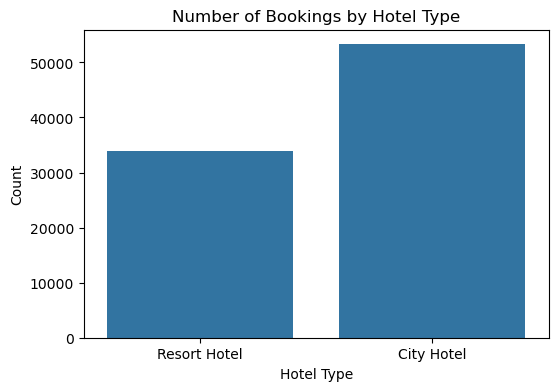

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['hotel'])
plt.title('Number of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

This suggests that City Hotels are more popular or more frequently booked than Resort Hotels.

### 5.3. Booking Cancellations Analysis

In [16]:
cancel_rate = df['is_canceled'].mean() * 100
print(f"Cancellation Rate: {cancel_rate:.2f}%")

Cancellation Rate: 27.52%


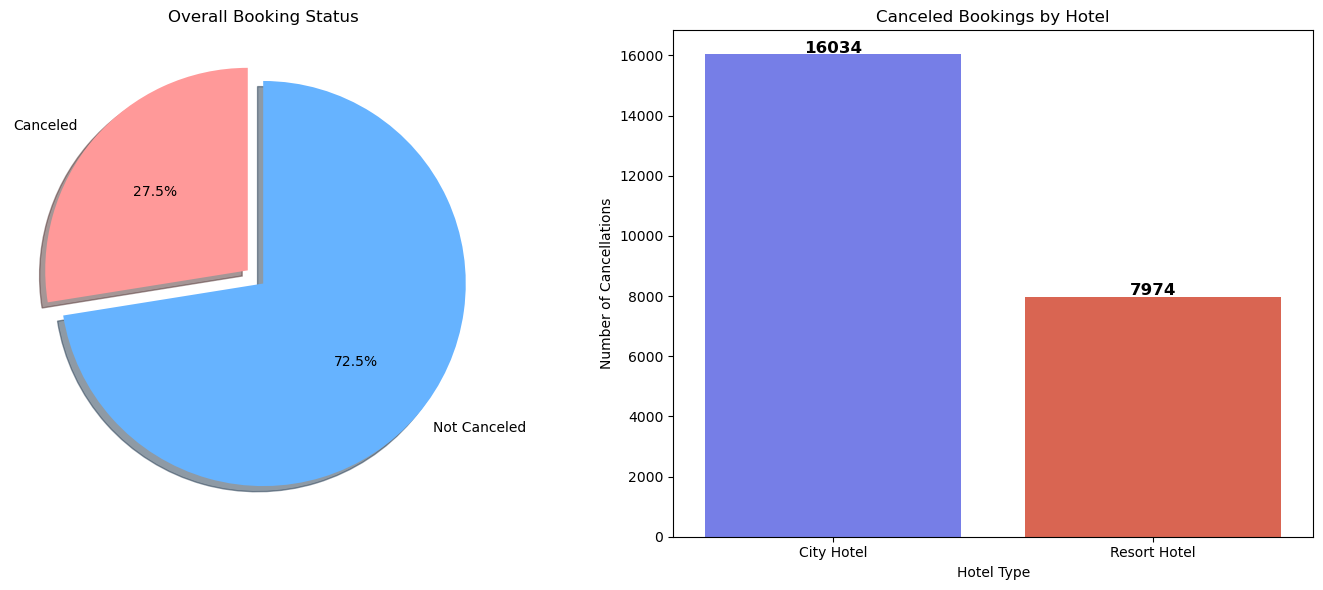

In [17]:
canceled_data = df[df['is_canceled'] == 1]

canceled_counts = canceled_data['hotel'].value_counts().reset_index()
canceled_counts.columns = ['Hotel', 'Cancellations']

total_canceled = len(canceled_data)
total_not_canceled = len(df) - total_canceled

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(
    [total_canceled, total_not_canceled], 
    labels=['Canceled', 'Not Canceled'], 
    autopct='%1.1f%%', 
    colors=['#FF9999', '#66B3FF'],
    startangle=90, 
    explode=(0.1, 0), 
    shadow=True
)
axes[0].set_title("Overall Booking Status")

sns.barplot(
    data=canceled_counts, 
    x='Hotel', 
    y='Cancellations', 
    hue='Hotel',
    palette=['#636EFA', '#EF553B'], 
    ax=axes[1],
    legend=False
)
axes[1].set_title("Canceled Bookings by Hotel")
axes[1].set_xlabel("Hotel Type")
axes[1].set_ylabel("Number of Cancellations")

for i, value in enumerate(canceled_counts['Cancellations']):
    axes[1].text(i, value + 50, str(value), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


Cancellation Proportion:

27,5% of bookings were canceled, while 72,5% were not canceled. This highlights the need to manage cancellation risks to avoid revenue loss.

Hotels Most Affected:

City Hotels had more bookings but also the highest cancellations (16.034 cancellations). Resort Hotels had fewer cancellations (7.974 cancellations).

### 5.4. Lead Time Distribution

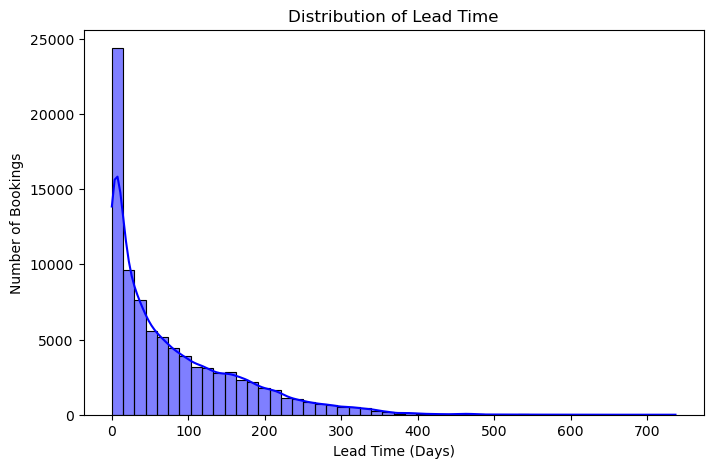

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.show()

- The majority of bookings are made within 0–50 days before check-in, with a sharp peak at very short lead times (close to 0 days).
- This suggests that many customers book hotels on short notice, likely for spontaneous trips or urgent travel needs.

### 5.5. Average Daily Rate (ADR) Distribution

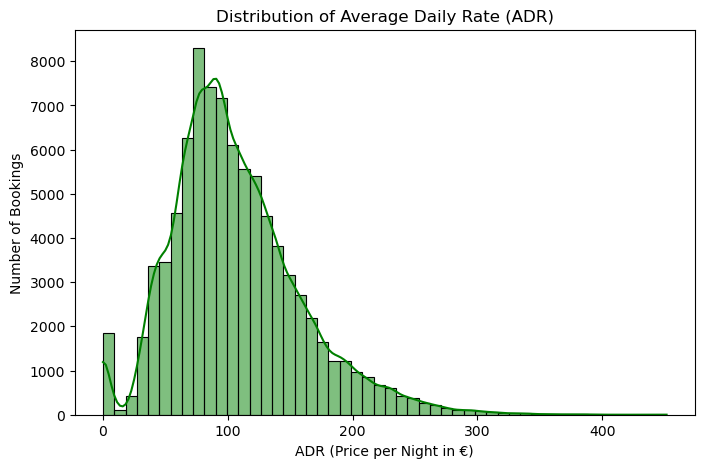

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['adr'] < 500]['adr'], bins=50, kde=True, color='green')
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR (Price per Night in €)')
plt.ylabel('Number of Bookings')
plt.show()

- Most customers prefer mid-range prices (€50–€150), likely due to budget-conscious travelers.
- Higher ADR values may be from luxury hotels or peak-season pricing.

### 5.6. Length of Stay

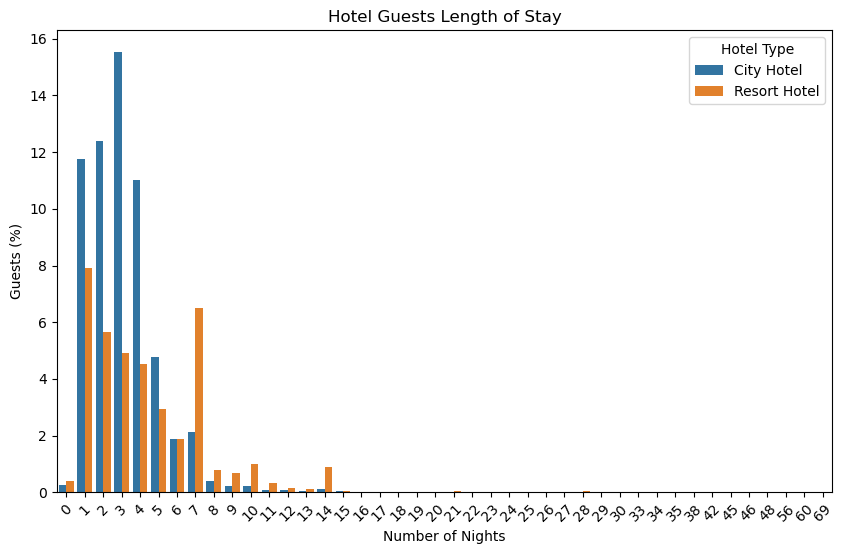

In [20]:
df['number_of_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

city_df = df[df['hotel'] == 'City Hotel']
resort_df = df[df['hotel'] == 'Resort Hotel']

city_nights = city_df.groupby('number_of_nights')['hotel'].count().reset_index(name='guests')
city_nights['hotel'] = 'City Hotel'

resort_nights = resort_df.groupby('number_of_nights')['hotel'].count().reset_index(name='guests')
resort_nights['hotel'] = 'Resort Hotel'

full_night_data = pd.concat([city_nights, resort_nights], ignore_index=True)

total_guests = full_night_data['guests'].sum()
full_night_data['percentage'] = (full_night_data['guests'] / total_guests) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=full_night_data, x='number_of_nights', y='percentage', hue='hotel')

plt.xlabel("Number of Nights")
plt.ylabel("Guests (%)")
plt.title("Hotel Guests Length of Stay")

plt.xticks(rotation=45)

plt.legend(title="Hotel Type")
plt.show()


The distribution reveals that most guests stay between 1 to 4 nights, with City Hotels experiencing a higher concentration of shorter stays compared to Resort Hotels. Resort Hotels, however, exhibit a slightly broader distribution with some guests staying for extended periods. This pattern suggests that City Hotels are more commonly used for short business or transit stays, whereas Resort Hotels cater to longer vacation stays.

### 5.6. Most Common Booking Months

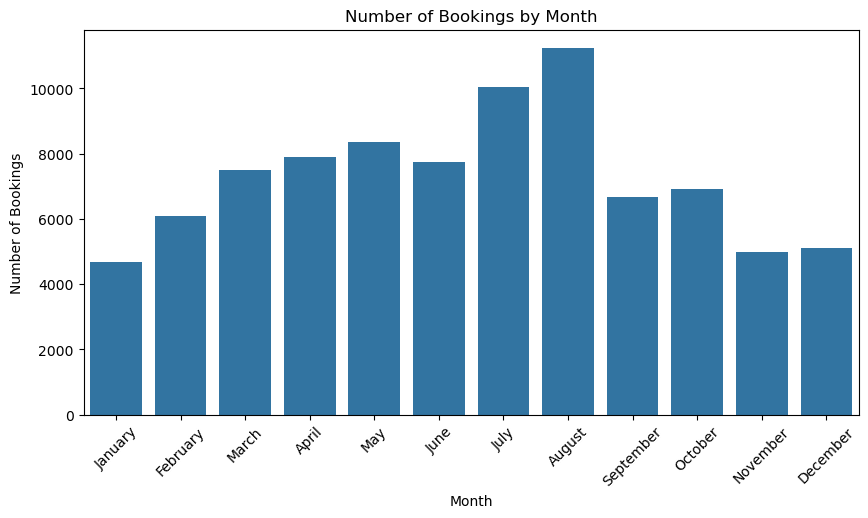

In [21]:
# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10,5))
sns.countplot(x=df['arrival_date_month'], order=month_order)
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

- August has the highest number of bookings, followed by July.
- January and December have the lowest number of bookings.

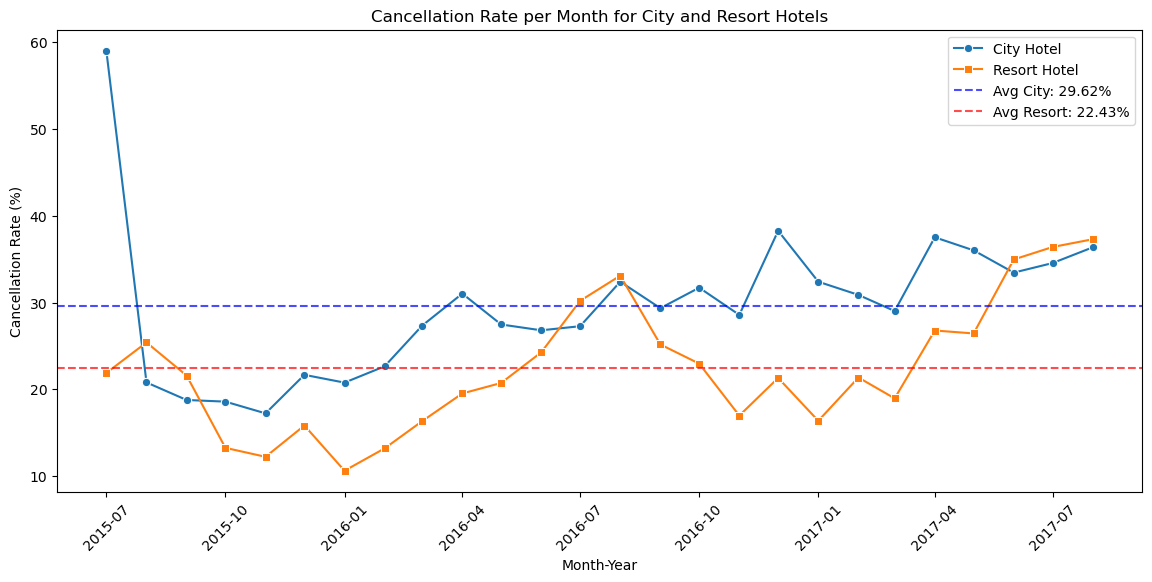

In [22]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                     df['arrival_date_month'], format='%Y-%B')

df['is_canceled'] = df['is_canceled'].astype(int)

monthly_cancellations = df.groupby([df['arrival_date'], 'hotel']).agg(
    total_bookings=('is_canceled', 'size'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

monthly_cancellations['cancellation_rate'] = (monthly_cancellations['total_cancellations'] / 
                                               monthly_cancellations['total_bookings']) * 100

city_hotel = monthly_cancellations[monthly_cancellations['hotel'] == 'City Hotel']
resort_hotel = monthly_cancellations[monthly_cancellations['hotel'] == 'Resort Hotel']

plt.figure(figsize=(14, 6))  

sns.lineplot(data=city_hotel, x='arrival_date', y='cancellation_rate', label="City Hotel", marker='o')

sns.lineplot(data=resort_hotel, x='arrival_date', y='cancellation_rate', label="Resort Hotel", marker='s')

city_avg_cancellation = city_hotel['cancellation_rate'].mean()
resort_avg_cancellation = resort_hotel['cancellation_rate'].mean()

plt.axhline(city_avg_cancellation, color='blue', linestyle='dashed', alpha=0.7, label=f'Avg City: {city_avg_cancellation:.2f}%')
plt.axhline(resort_avg_cancellation, color='red', linestyle='dashed', alpha=0.7, label=f'Avg Resort: {resort_avg_cancellation:.2f}%')

plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate per Month for City and Resort Hotels")
plt.legend()

plt.show()


In [23]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                     df['arrival_date_month'], format='%Y-%B')

df['is_canceled'] = df['is_canceled'].astype(int)

monthly_cancellations = df.groupby([df['arrival_date'], 'hotel']).agg(
    total_bookings=('is_canceled', 'size'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

monthly_cancellations['cancellation_rate'] = (monthly_cancellations['total_cancellations'] / 
                                               monthly_cancellations['total_bookings']) * 100

cancellation_table = monthly_cancellations.pivot(index='arrival_date', columns='hotel', values='cancellation_rate')

cancellation_table.columns = ['City Hotel', 'Resort Hotel']

cancellation_table.reset_index(inplace=True)

print(cancellation_table)


   arrival_date  City Hotel  Resort Hotel
0    2015-07-01   59.033079     21.892103
1    2015-08-01   20.799273     25.408618
2    2015-09-01   18.776245     21.593830
3    2015-10-01   18.585209     13.257243
4    2015-11-01   17.232704     12.226067
5    2015-12-01   21.674877     15.833333
6    2016-01-01   20.776699     10.622711
7    2016-02-01   22.658610     13.199301
8    2016-03-01   27.349704     16.336295
9    2016-04-01   31.037344     19.528371
10   2016-05-01   27.478632     20.737648
11   2016-06-01   26.806833     24.269481
12   2016-07-01   27.280065     30.205279
13   2016-08-01   32.407407     33.105165
14   2016-09-01   29.356725     25.175370
15   2016-10-01   31.718395     22.965300
16   2016-11-01   28.584861     16.976351
17   2016-12-01   38.275340     21.317158
18   2017-01-01   32.408501     16.374781
19   2017-02-01   30.888430     21.364985
20   2017-03-01   29.028340     18.959732
21   2017-04-01   37.528174     26.784500
22   2017-05-01   36.022208     26

**1. Seasonal Trends:**

- ADR for both hotel types fluctuates across months and years, showing seasonal effects.
- Peak ADR values tend to appear in summer months (July and August), particularly for Resort Hotels, which suggests increased demand during vacation periods.
- The lowest ADR values are generally seen in winter months (December to February), indicating off-season pricing.

**2. Comparison Between City and Resort Hotels:**

- City Hotels generally have a higher ADR than Resort Hotels in most months, except for the summer peak, when Resort Hotels' rates increase significantly.
- Resort Hotels show a more pronounced seasonal fluctuation, with notable jumps in ADR during mid-year (July–August).

**3. Year-over-Year Growth:**

- Both City and Resort Hotels show an upward trend in ADR over time, indicating price increases or higher demand.
- The ADR for City Hotels increased from 59 in July 2015 to 36 in August 2017, while Resort Hotels rose from 22 in July 2015 to 37 in August 2017.
- The increase in Resort Hotel ADR is more significant, likely due to growing tourism demand.

**4. Notable Peaks Season:**

- The highest ADR for City Hotels appears in December 2016 (38.3).
- The highest ADR for Resort Hotels occurs in August 2017 (37.3), reinforcing the impact of the summer holiday season.

### 5.7. Geographical Distribution of Hotel Guests Analysis

In [24]:
if 'country' in df.columns:
    country_counts = df['country'].value_counts().reset_index()
    country_counts.columns = ['Country', 'Guest Count']
    country_counts = country_counts[country_counts['Country'].notnull()]

    total_guests = country_counts['Guest Count'].sum()
    country_counts['Guests in %'] = (country_counts['Guest Count'] / total_guests) * 100

    country_counts.set_index('Country', inplace=True)

    guest_map = go.Choropleth(
        locations=country_counts.index,  
        z=country_counts['Guests in %'],  
        hoverinfo='location+z',  
        colorscale='YlGnBu',  
        reversescale=True,  
        colorbar_title="Guests in %", 
    )

    fig = go.Figure(guest_map)

    fig.update_layout(
        title="Geographical Distribution of Hotel Guests by Country (Percentage)",
        geo=dict(
            showcoastlines=True,
            coastlinecolor="Black",
            projection_type="natural earth",
            lakecolor="white", 
            projection_scale=7,
        ),
        height=700,  
        width=1000, 
    )

    fig.show()
else:
    print("Column 'country' not found in DataFrame.")


In [25]:
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Guest Count']

total_guests = country_counts['Guest Count'].sum()
country_counts['Percentage'] = (country_counts['Guest Count'] / total_guests) * 100

guest_distribution = country_counts[['Country', 'Percentage']].head(10)

print(guest_distribution.to_string(index=False))


Country  Percentage
    PRT   31.359197
    GBR   11.949145
    FRA   10.114871
    ESP    8.304673
    DEU    6.173476
    ITA    3.509194
    IRL    3.456459
    BEL    2.385702
    BRA    2.284817
    NLD    2.189664


**Geographical Distribution of Hotel Guests:**

Guests come from various parts of the world. Since the dataset is from Portugal, most guests are from European countries, mainly `Portugal` (31.36%), followed by `Great Britain` (11.95%), `France` (10.11%), `Spain` (8.30%), `Germany` (6.17%), and `Italy` (3.51%).

### 5.8. Customer Segmentation by Market Segment

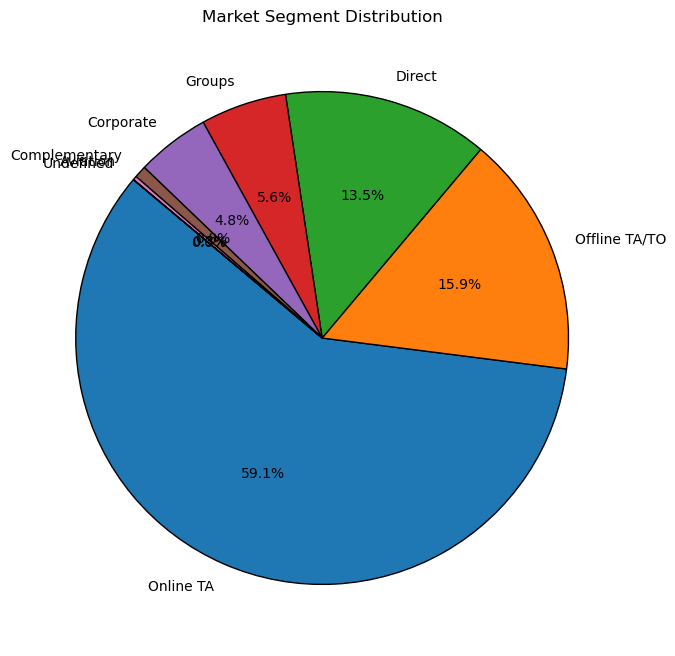

In [26]:
market_segment_counts = df['market_segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(market_segment_counts, labels=market_segment_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Market Segment Distribution')
plt.show()


-	The largest market segment is “Online TA” (Online Travel Agencies), with the highest number of bookings.
-	This indicates that most customers prefer booking through online platforms.

### 5.9. Relationship Between Special Requests and Cancellations

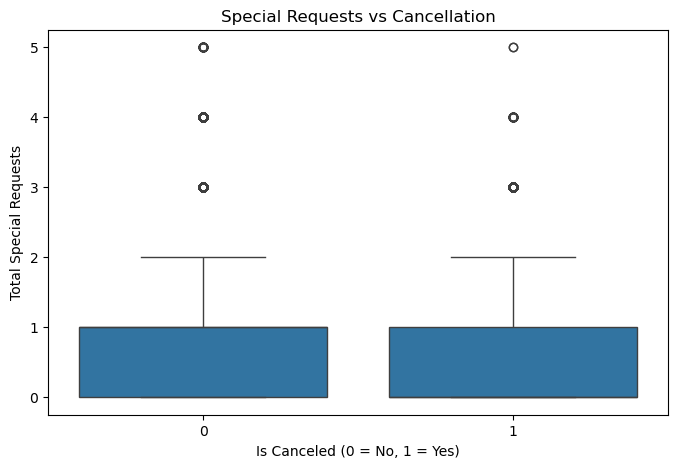

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['is_canceled'], y=df['total_of_special_requests'])
plt.title('Special Requests vs Cancellation')
plt.xlabel('Is Canceled (0 = No, 1 = Yes)')
plt.ylabel('Total Special Requests')
plt.show()

-	The median number of special requests is about 1 for both canceled and non-canceled bookings.
-	The IQR (middle 50% of data) is also similar, indicating no strong relationship between special requests and cancellations.
- There are a few extreme cases (outliers) where guests made up to 5 special requests, but these cases occur in both canceled and non-canceled bookings.

## 6. Data Preparation for Modelling

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87228 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87228 non-null  object        
 1   is_canceled                     87228 non-null  int32         
 2   lead_time                       87228 non-null  int64         
 3   arrival_date_year               87228 non-null  int64         
 4   arrival_date_month              87228 non-null  object        
 5   arrival_date_week_number        87228 non-null  int64         
 6   arrival_date_day_of_month       87228 non-null  int64         
 7   stays_in_weekend_nights         87228 non-null  int64         
 8   stays_in_week_nights            87228 non-null  int64         
 9   adults                          87228 non-null  int64         
 10  children                        87228 non-null  float64       
 11  babies

###  6.1. Feature Engineering

**Domestic vs. International Guests**

Since this dataset was collected in Portugal (PRT), guests from Portugal are classified as Domestic Travelers, while guests from other countries are classified as International Travelers. This categorization simplifies the Country feature by grouping guests into just two categories: Domestic and International.

**Number of Nights**

In a previous analysis (How long do people stay at hotels?), the total length of stay was calculated by adding "Stays in Weekend Nights" and "Stays in Week Nights". Combining these two columns into a single "Number of Nights" column provides a more objective measure of how long guests stay.

In [29]:
# Country Classification
def classify_country(country):
    if country == 'PRT':
        return 'Domestik'
    else:
        return 'Internasional'

df['country'] = df['country'].apply(classify_country)
df.country.value_counts()

country
Internasional    59874
Domestik         27354
Name: count, dtype: int64

In [30]:
# Length of stay
df.drop(['stays_in_weekend_nights', 'stays_in_week_nights'], axis=1, inplace = True)

###  6.3. Correlation Matrix and Multicollinearity

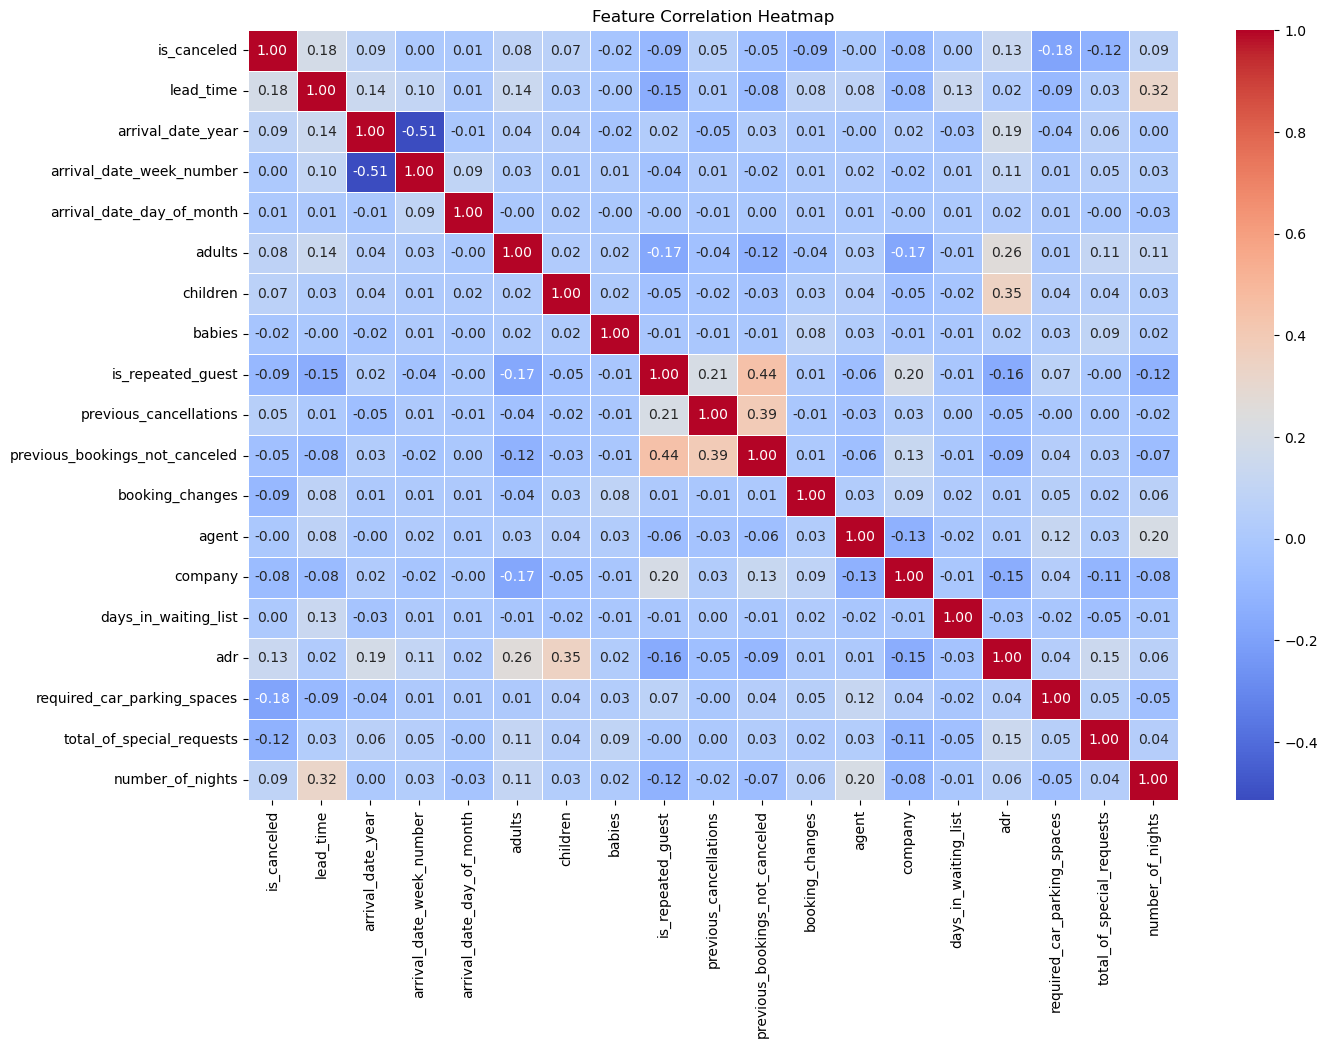

In [31]:
# Correlation matrix and multicollinearity check

numerical_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

No extreme correlations (above 0.8), so multicollinearity is not a major issue.

### 6.4. Feature Selection

In [32]:
features = df.drop(columns=['is_canceled','arrival_date_year','arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month',
                    'reservation_status', 'adults', 'children', 'babies', 'previous_bookings_not_canceled', 'assigned_room_type',
                    'reservation_status_date', 'arrival_date', 'arrival_date_week_number','meal'])

target = 'is_canceled'

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87228 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87228 non-null  object        
 1   is_canceled                     87228 non-null  int32         
 2   lead_time                       87228 non-null  int64         
 3   arrival_date_year               87228 non-null  int64         
 4   arrival_date_month              87228 non-null  object        
 5   arrival_date_week_number        87228 non-null  int64         
 6   arrival_date_day_of_month       87228 non-null  int64         
 7   adults                          87228 non-null  int64         
 8   children                        87228 non-null  float64       
 9   babies                          87228 non-null  int64         
 10  meal                            87228 non-null  object        
 11  countr

### 6.5. Splitting Features and Target

In [34]:
X = df[features.columns]
y = df[target]

In [35]:
X

,hotel,lead_time,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,number_of_nights
0,Resort Hotel,342,Domestik,Direct,Direct,0,0,C,3,No Deposit,0,0,0,Transient,0.00,0,0,0
1,Resort Hotel,737,Domestik,Direct,Direct,0,0,C,4,No Deposit,0,0,0,Transient,0.00,0,0,0
2,Resort Hotel,7,Internasional,Direct,Direct,0,0,A,0,No Deposit,0,0,0,Transient,75.00,0,0,1
3,Resort Hotel,13,Internasional,Corporate,Corporate,0,0,A,0,No Deposit,304,0,0,Transient,75.00,0,0,1
4,Resort Hotel,14,Internasional,Online TA,TA/TO,0,0,A,0,No Deposit,240,0,0,Transient,98.00,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,Internasional,Offline TA/TO,TA/TO,0,0,A,0,No Deposit,394,0,0,Transient,96.14,0,0,7
119386,City Hotel,102,Internasional,Online TA,TA/TO,0,0,E,0,No Deposit,9,0,0,Transient,225.43,0,2,7
119387,City Hotel,34,Internasional,Online TA,TA/TO,0,0,D,0,No Deposit,9,0,0,Transient,157.71,0,4,7
119388,City Hotel,109,Internasional,Online TA,TA/TO,0,0,A,0,No Deposit,89,0,0,Transient,104.40,0,0,7


### 6.6. Feature Transform

- **Encoding**
    - `Country` --> Ordinal Encoding --> Values have an order (Domestic < International) based on distance and price.
    - `Reserved Room Type` --> Ordinal Encoding --> Room types follow an order in terms of quality and pricing.
    - `Hotel` -->  One Hot Enconding --> Since there are only 2 unique values, one-hot encoding is the best choice.
    - `Distribution Channel` --> One Hot Encoding --> Since there are only 2 unique values, one-hot encoding is the best choice.
    - `Deposit Type` --> One Hot Encoding --> Since there are 4 unique values, one-hot encoding is preferred.
    - `Customer Type` --> One Hot Encoding --> With 4 unique categories, one-hot encoding works best
    - `Market Segment` --> Binary Encoding --> Since it has 7 unique values, binary encoding is the better option.

- **Scaling**
    - `Lead Time` --> Robust Scaler
    - `Is Repeated Guest` --> Robust Scaler
    - `Previous Cancellations` --> Robust Scaler
    - `Booking Changes` --> Robust Scaler
    - `Days in Waiting List` --> Robust Scaler
    - `ADR (Average Daily Rate)` -- Robust Scaler
    - `Required Car Parking Space` --> Robust Scaler
    - `Total of Special Request` --> Robust Scaler
    - `Number of Nights` --> Robust Scaler

Using Robust Scaler because it is less affected by extreme values (outliers).

- **Resampling**
    - SMOTE (Synthetic Minority Over-sampling Technique): generates new synthetic samples for the minority class by interpolating between real data points instead of duplicating existing ones, making the dataset more balanced.
    - Random Over Sampling: duplicates existing minority class samples randomly to balance the dataset, increasing its size but potentially leading to overfitting.
    - Random Under Sampling: randomly removes samples from majority class to balance the dataset, reducing its size but potentially causing the loss of important information.
    - Near Miss: type of under-sampling that selects majority class samples closest to minority class samples, helping retain informative data while reducing imbalance.


In [36]:
ordinal_mapping = [{'col':'country', 'mapping':{'Internasional':1, 'Domestik':2}}]

ordinal_mapping2 = [{'col':'reserved_room_type', 'mapping':{'A': 1, 'E' : 2, 'D': 3, 'F': 4, 'B' : 5, 'G': 6, 'C': 7, 'H': 8, 'P': 9}}]

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['country',], mapping=ordinal_mapping)),
    ('min_max_scaler', MinMaxScaler())
])

pipe_ordinal_scale2 = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['reserved_room_type'], mapping=ordinal_mapping2)),
    ('min_max_scaler', MinMaxScaler())
])

transform = ColumnTransformer(transformers=[
            ('onehot_encoder', OneHotEncoder(drop='first'), ['hotel', 'distribution_channel', 'deposit_type', 'customer_type']), 
            ('binary_encoder', BinaryEncoder(), ['market_segment']),
            ('pipe_ordinal_scale2', pipe_ordinal_scale2, ['reserved_room_type']),
            ('pipe_ordinal_scale', pipe_ordinal_scale, ['country']),
            ('robust_scaller', RobustScaler(), ['lead_time','is_repeated_guest','previous_cancellations', 'booking_changes', 'days_in_waiting_list','adr','required_car_parking_spaces', 'total_of_special_requests','number_of_nights'])],
             remainder='passthrough')
transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot_encoder', OneHotEncoder(drop='first'),
                                 ['hotel', 'distribution_channel',
                                  'deposit_type', 'customer_type']),
                                ('binary_encoder', BinaryEncoder(),
                                 ['market_segment']),
                                ('pipe_ordinal_scale2',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['reserved_room_type'],
                                                                 mapping=[{'col': 'reserved_room_type'...
                                                                 mapping=[{'col': 'country',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Internasional    1
Domestik         2
dtype: int64}])),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['country']),
                                ('robust_scaller', RobustScaler(),
                                 ['lead_time', 'is_repeated_guest',
                                  'previous_cancellations', 'booking_changes',
                                  'days_in_waiting_list', 'adr',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests',
                                  'number_of_nights'])])

### 6.7. Splitting Data into Training and Testing Sets

To evaluate our model, we split the dataset into:
-	80% Training Data (for model training)
-	20% Testing Data (for evaluation)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1811)

## 7. Modelling & Evaluation

### 7.1. Model Selection

We will use the following models:
- **Logistic Regression**
- **Decision Tree**
- **XGBoost**
- **Random Forest**
- **Light GBM**

In [38]:
# Models
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)

# Imbalance Treatment
ros = RandomOverSampler(random_state=20)
rus = RandomUnderSampler(random_state=20)
smote = SMOTE(random_state=20)
near = NearMiss()


models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Light GBM': lgbm,
}


resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# Metrics Classification
# Define custom F0.5 score
f05_scorer = make_scorer(fbeta_score, beta=0.5)

metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'f0.5': f05_scorer 
}

test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
test_f05_arr = []
list_model = []
list_resample = []

# Iterate over all models, resampling, and cross-validate method
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = Pipeline([
                ('preprocessor', transform),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('preprocessor', transform),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)
        test_f05_arr.append(scores['test_f0.5'].mean() * 100)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr,
    'F0.5': test_f05_arr
})

model_bench

[LightGBM] [Info] Number of positive: 15364, number of negative: 40461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 55825, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275217 -> initscore=-0.968311
[LightGBM] [Info] Start training from score -0.968311
[LightGBM] [Info] Number of positive: 15365, number of negative: 40460
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 55825, number of used features: 25
[LightGBM] [Info] 

,model,resample,accuracy,precision,recall,F1,F0.5
0,Logistic Regression,none,65.354697,65.327284,38.462075,48.396485,57.297200
1,Decision Tree,none,72.871950,60.631535,60.715434,60.671700,60.647174
2,XGBoost,none,76.991593,73.752670,62.418019,67.611280,71.166216
3,Random Forest,none,76.314083,70.407989,62.621049,66.284742,68.698097
4,Light GBM,none,76.913193,74.235128,61.996270,67.562683,71.413000
5,Logistic Regression,ros,73.306094,50.574003,74.133141,60.119961,54.002783
6,Decision Tree,ros,72.475223,60.057640,60.137497,60.095373,60.072206
7,XGBoost,ros,80.724629,58.728009,83.817576,69.064490,62.467637
8,Random Forest,ros,77.772019,66.183069,68.915996,67.521015,66.711635
9,Light GBM,ros,80.972700,57.959500,85.494115,69.083871,61.949673


Resampling techniques for imbalanced data, such as Random Over Sampling and Random Under Sampling, have proven effective in helping the model detect the minority class better. This is evident from the significant improvement in metrics compared to not using resampling.

In [39]:
# Top 5 Models by F0,5 SCore
top_model = model_bench.sort_values(by='F0.5', ascending=False).head()
top_model

,model,resample,accuracy,precision,recall,F1,F0.5
4,Light GBM,none,76.913193,74.235128,61.996270,67.562683,71.413000
2,XGBoost,none,76.991593,73.752670,62.418019,67.611280,71.166216
3,Random Forest,none,76.314083,70.407989,62.621049,66.284742,68.698097
8,Random Forest,ros,77.772019,66.183069,68.915996,67.521015,66.711635
18,Random Forest,smote,77.844195,65.591254,69.540810,67.507773,66.344534


### 7.2. Best Models

In [40]:
# Sorting for highest Recall
top_recall_per_model = model_bench.loc[model_bench.groupby('model')['F0.5'].idxmax()]
top_recall_per_model = top_recall_per_model.sort_values(by='F0.5', ascending=False)
top_recall_per_model

,model,resample,accuracy,precision,recall,F1,F0.5
4,Light GBM,none,76.913193,74.235128,61.996270,67.562683,71.413000
2,XGBoost,none,76.991593,73.752670,62.418019,67.611280,71.166216
3,Random Forest,none,76.314083,70.407989,62.621049,66.284742,68.698097
1,Decision Tree,none,72.871950,60.631535,60.715434,60.671700,60.647174
0,Logistic Regression,none,65.354697,65.327284,38.462075,48.396485,57.297200


**Best Model Conclusion**

Based on the benchmark results from five models, we analyze the F0.5 score, which prioritizes precision while maintaining recall.

From the table, the model with the highest F0.5 score is `LightGBM` with a value of `71.41`, followed closely by XGBoost (71.16). These models outperform the others, making LightGBM the best model for this task.

We conclude that `LightGBM` is the most suitable model for prediction. The next step is to evaluate its performance on the test dataset.

### 7.3. Model to Data Test

In [41]:
lgbm = lgb.LGBMClassifier(random_state=42)

ros = RandomOverSampler(random_state=20)
rus = RandomUnderSampler(random_state=20)
smote = SMOTE(random_state=20)
near = NearMiss()

models = [
    ('LightGBM', lgbm),
]


resamples = [
    ('none', None),
    ('RandomOverSampling', ros),
    ('RandomUnderSampling', rus),
    ('smote', smote),
    ('near miss', near)
]


metrics = []
conf_matrix = []

for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = Pipeline([
            ('transformer', transform),  
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            f'{name_model} with {name_resample}',
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            recall_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100,
            fbeta_score(y_test, y_pred, beta=0.5) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))
        
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'F0.5'])
metrics_df

[LightGBM] [Info] Number of positive: 19206, number of negative: 50576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 69782, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275229 -> initscore=-0.968254
[LightGBM] [Info] Start training from score -0.968254
[LightGBM] [Info] Number of positive: 50576, number of negative: 50576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 101152, number of used features: 25
[LightGBM] [Info]

,Model,Accuracy,Precision,Recall,F1,F0.5
0,LightGBM with none,83.537774,73.410966,63.015410,67.817122,71.066228
1,LightGBM with RandomOverSampling,78.722916,57.529704,86.713869,69.169435,61.681578
2,LightGBM with RandomUnderSampling,78.722916,57.556850,86.443149,69.102714,61.679049
3,LightGBM with smote,80.711911,61.613060,79.383590,69.378469,64.500846
4,LightGBM with near miss,58.810042,37.316450,73.032070,49.394366,41.361985


In [42]:
metrics_df['Model'] = metrics_df['Model'].replace({
    'LightGBM with smote': 'LightGBM Before Tune'
})

metrics_df_selected = metrics_df[metrics_df['Model'] == 'LightGBM Before Tune']
metrics_df_selected

,Model,Accuracy,Precision,Recall,F1,F0.5
3,LightGBM Before Tune,80.711911,61.61306,79.38359,69.378469,64.500846


From the LightGBM model testing, we observe that the model with no resampling has the highest F0.5 score (71.07) compared to other resampling techniques. However, since the dataset is imbalanced, relying solely on this model could lead to biased predictions, as it may favor the dominant class.

If imbalanced data is not addressed, the model’s metrics could give misleading interpretations, prioritizing majority class predictions over minority class detection.

To handle this, we will proceed with the `SMOTE resampling technique`, which has the second-best F0.5 score (`64.50`) after the no-resampling model. This approach improves recall while maintaining a balanced performance.


### 7.4. Hyperparameter Tuning: LightGBM

In [43]:
f05_scorer = make_scorer(fbeta_score, beta=0.5)

lgbm = lgb.LGBMClassifier(random_state=42)
smote = SMOTE(random_state=20)

pipe_model = Pipeline([
    ('prep', transform),  
    ('resampling', smote),
    ('model', lgbm)
])

hyperparam_space = {
    'model__n_estimators': [100, 150],  
    'model__max_depth': [10, 20],  
    'model__num_leaves': [31, 50],  
    'model__learning_rate': [0.05, 0.1], 
    'model__colsample_bytree': [0.8],  
    'model__subsample': [0.8],  
    'model__reg_alpha': [0.1],  
    'model__reg_lambda': [0.1],  
}

gscv = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam_space,
    cv=5,
    scoring= f05_scorer,
    n_jobs=-1
)

gscv.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 50576, number of negative: 50576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4923
[LightGBM] [Info] Number of data points in the train set: 101152, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['hotel',
                                                                          'distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['market_segment']),
                                                                        ('pipe_ordinal_scale2',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(cols=['reser...
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8],
                         'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [10, 20],
                         'model__n_estimators': [100, 150],
                         'model__num_leaves': [31, 50],
                         'model__reg_alpha': [0.1], 'model__reg_lambda': [0.1],
                         'model__subsample': [0.8]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=0.5))

In [44]:
# Output the best parameters and best score
best_params = gscv.best_params_
best_score = gscv.best_score_

print("Best Parameters:", best_params)
print("Best F0.5 Score:", best_score)

Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 20, 'model__n_estimators': 150, 'model__num_leaves': 50, 'model__reg_alpha': 0.1, 'model__reg_lambda': 0.1, 'model__subsample': 0.8}
Best F0.5 Score: 0.6596251459185798


In [45]:
lgbm_tuning = gscv.best_estimator_
lgbm_tuning.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 50576, number of negative: 50576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4923
[LightGBM] [Info] Number of data points in the train set: 101152, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['hotel',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['market_segment']),
                                                 ('pipe_ordinal_scale2',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(cols=['reserved_room_type'],
                                                                                  mapping=[{'c...
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests',
                                                   'number_of_nights'])])),
                ('resampling', SMOTE(random_state=20)),
                ('model',
                 LGBMClassifier(colsample_bytree=0.8, max_depth=20,
                                n_estimators=150, num_leaves=50,
                                random_state=42, reg_alpha=0.1, reg_lambda=0.1,
                                subsample=0.8))])

In [46]:
y_pred_lgbm_tuning = lgbm_tuning.predict(X_test)

accuracy_lgbm_tuning = accuracy_score(y_test, y_pred_lgbm_tuning) * 100
precision_lgbm_tuning = precision_score(y_test, y_pred_lgbm_tuning) * 100
recall_lgbm_tuning = recall_score(y_test, y_pred_lgbm_tuning) * 100
f1_lgbm_tuning = f1_score(y_test, y_pred_lgbm_tuning) * 100
f05_lgbm_tuning = fbeta_score(y_test, y_pred_lgbm_tuning, beta=0.5) * 100

lgbm_after_tuning = pd.DataFrame({
    'Model': ['LightGBM After Tuning'],
    'Accuracy': [accuracy_lgbm_tuning],
    'Precision': [precision_lgbm_tuning],
    'Recall': [recall_lgbm_tuning],
    'F1': [f1_lgbm_tuning],
    'F0.5': [f05_lgbm_tuning]
})


metrics_df_selected = metrics_df_selected.reset_index(drop=True)

# Concat DataFrame with Metrics Before Tune
metrics_combined = pd.concat([lgbm_after_tuning, metrics_df_selected], ignore_index=True)
metrics_combined

,Model,Accuracy,Precision,Recall,F1,F0.5
0,LightGBM After Tuning,81.640491,63.654996,77.613494,69.944637,66.030047
1,LightGBM Before Tune,80.711911,61.613060,79.383590,69.378469,64.500846


After hyperparameter tuning, the LightGBM model showed significant improvement, with the F0.5 score increasing from 61.68% to 66.03%, indicating better precision-recall balance. Accuracy improved from 78.72% to 81.64%, while precision increased from 57.53% to 63.65%, reducing false positives. Although recall slightly decreased from 86.71% to 77.61%, this trade-off is expected as the model now focuses more on making precise predictions. The F1 score remained stable, ensuring overall model balance. These improvements make the model more reliable for predicting cancellations while minimizing unnecessary false positives.

### 7.5. Train and Test Model After Hyperparameter Tuning

In [47]:
# Compute recall on the training set
train_pred = lgbm_tuning.predict(X_train)
train_precision = precision_score(y_train, train_pred)
train_f05 = fbeta_score(y_train, train_pred, beta=0.5)

# Compute recall on the test set
test_pred = lgbm_tuning.predict(X_test)
test_precision = precision_score(y_test, test_pred)
test_f05 = fbeta_score(y_test, test_pred, beta=0.5)

# Create a DataFrame with the results
df_results = pd.DataFrame({
    'model': ['LightGBM After Tuning'],
    'Train F0.5': [train_f05],
    'Test F0.5': [test_f05],
    'Train Precision': [train_precision],
    'Test Precision': [test_precision]
}).set_index('model')


df_results

,Train F0.5,Test F0.5,Train Precision,Test Precision
model,,,,
LightGBM After Tuning,0.688713,0.6603,0.666217,0.63655


**Model Conclusion**

The Train F0.5 score (0.6887) is slightly higher than the Test F0.5 score (0.6603), indicating that the model performs well on both training and test data with minimal overfitting. Similarly, the Train Precision (0.6662) is slightly higher than the Test Precision (0.6365), showing that the model maintains strong predictive power across both datasets. While a small drop from training to testing is expected, the close scores suggest that the model generalizes well and is not overfitted. This confirms that the LightGBM model is well-tuned, effectively balancing precision and recall for accurate predictions.

### 7.6. Confusion Matrix

In [48]:
# Evaluation with Best Estimator
y_pred_test = gscv.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     12644
           1       0.64      0.78      0.70      4802

    accuracy                           0.82     17446
   macro avg       0.77      0.80      0.78     17446
weighted avg       0.83      0.82      0.82     17446

[[10516  2128]
 [ 1075  3727]]


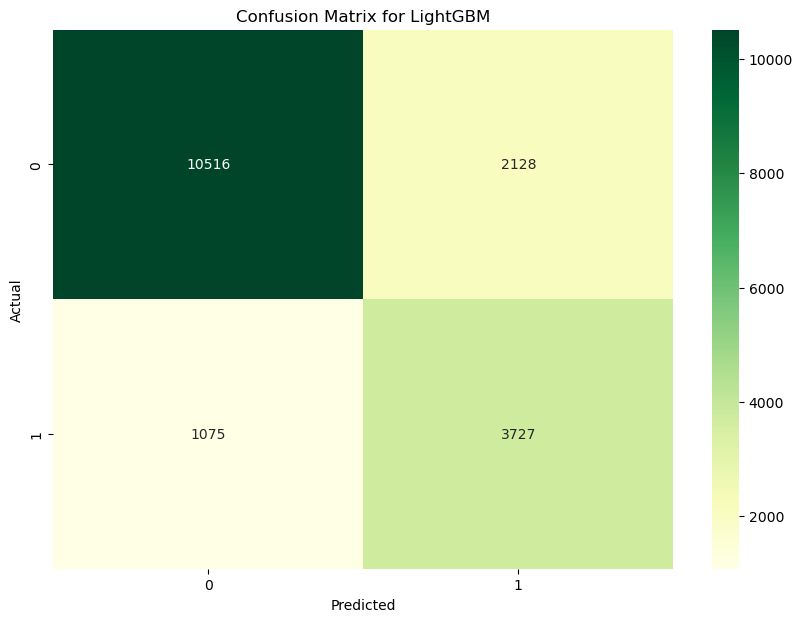

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LightGBM')
plt.show()

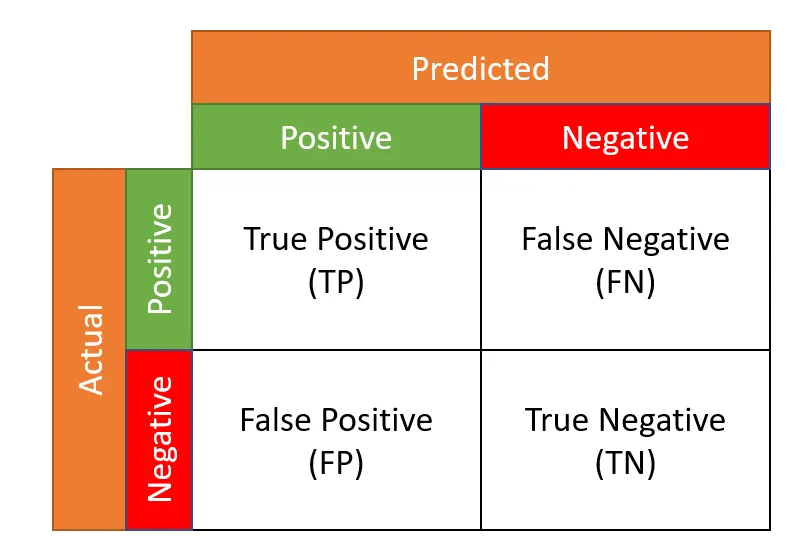

**Confusion Matrix Breakdown**

- True Positives (TP) = 3,727 → Correctly predicted class 1 (positive class).
- True Negatives (TN) = 10,516 → Correctly predicted class 0 (negative class).
- False Positives (FP) = 2,128 → Incorrectly predicted class 1 when it was actually 0 (Type I Error).
- False Negatives (FN) = 1,075 → Incorrectly predicted class 0 when it was actually 1 (Type II Error).

**Performance Metrics**

- Accuracy = 82% → The overall correctness of the model’s predictions.
- Precision (Class 1) = 0.64 → When the model predicts 1, it is correct 64% of the time.
- Recall (Class 1) = 0.78 → The model correctly identifies 78% of all actual class 1 cases.
- F1-score (Class 1) = 0.70 → A balance between precision and recall.
- Weighted Avg F1-score = 0.82 → Reflects overall model performance, considering class imbalances.

**Conclution**

1. The model performs well overall (82% accuracy) but still struggles with class imbalance, as seen in the lower precision for class 1.
2. Higher recall (0.78) for class 1 means the model captures most of the positive class instances, reducing false negatives.
3. False positives (2,128 cases) indicate some misclassification of class 0 as class 1, which may lead to unnecessary actions.
4. False negatives (1,075 cases) suggest some actual positive cases are missed, which could be problematic in certain applications.

### 7.8. Feature Importance

In [50]:
lgbm = lgb.LGBMClassifier(random_state=42)
smote = SMOTE(random_state=20)

estimator = Pipeline([
    ('prep', transform),
    ('resample', smote),
    ('model', lgbm)
])

estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)

# Evaluate model using F-beta score (β=0.5)
test_f05 = fbeta_score(y_test, y_pred, beta=0.5)

[LightGBM] [Info] Number of positive: 50576, number of negative: 50576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4923
[LightGBM] [Info] Number of data points in the train set: 101152, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


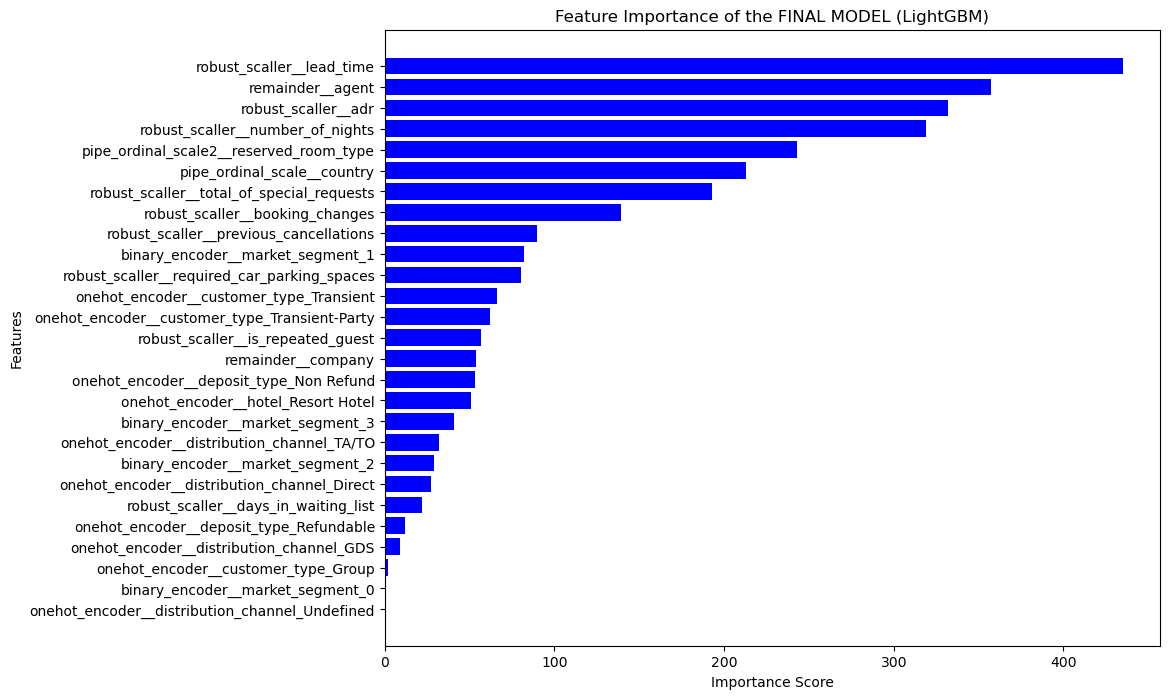

In [51]:
feature_importance = estimator.named_steps['model'].feature_importances_

feature_names = transform.get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance of the FINAL MODEL (LightGBM)')
plt.show()


- The model primarily predicts cancellations based on `lead time` (how far in advance a booking is made), booking `agent`, `ADR` (Average Daily Rate or pricing), and `length of stay`. These factors have the strongest influence on whether a guest cancels their booking.
- `room type`, guest's `country` of origin, and the `number of special requests` also play a role in predicting cancellations, though they are slightly less significant.
- Meanwhile, `booking channels` (such as online travel agencies or direct bookings) and `customer types` (transient, group, or contract guests) have some impact but are not as influential in the model’s decision-making process.

## 8. Conclusion

Through Exploratory Data Analysis (EDA) and Machine Learning Modeling, we gained valuable insights into hotel booking cancellations.

### 8.1. Key Findings from EDA:

**1. City Hotels Are More Popular**

- City Hotels receive more bookings than Resort Hotels, indicating higher demand, possibly due to business and transit stays.

**2. High Cancellation Rate**

- 27.5% of total bookings were canceled, with City Hotels experiencing the most cancellations (16,034 cases).
- This highlights the need for better cancellation management strategies to reduce revenue loss.

**3. Short Booking Lead Times**

- Most bookings are made within 0–50 days before check-in, with a significant number of last-minute reservations.
- This suggests spontaneous travel trends, requiring flexible pricing and inventory management.

**4. ADR Trends and Seasonal Effects**

- Most customers prefer mid-range ADR (€50–€150), with peak ADR observed in summer (July–August) due to vacation demand.
- City Hotels generally have higher ADR, but Resort Hotels experience strong seasonal fluctuations, especially in the summer months.

**5. Shorter Stays in City Hotels, Longer Stays in Resort Hotels**

- Guests typically stay between 1 to 4 nights, with City Hotels having a higher concentration of short stays.
- Resort Hotels show a wider distribution, catering to extended vacation stays.

**6. Booking Seasonality**

- August and July see the highest bookings, aligning with summer holidays.
- January and December have the lowest bookings, indicating an off-season period.

**7. Majority of Guests Are from Europe**

- Portugal has the highest proportion of guests (31.36%), followed by Great Britain, France, Spain, Germany, and Italy.
- This suggests the need for localized marketing strategies targeting European travelers.

**8. Online Travel Agencies (OTA) Dominate Bookings**

- The largest booking source is Online Travel Agencies (OTAs), showing that most travelers prefer online platforms.
- Hotels should optimize their pricing and visibility on these platforms to maximize bookings.

**9. No Strong Relationship Between Special Requests and Cancellations**

- The number of special requests is similar for both canceled and non-canceled bookings, suggesting that guest preferences do not significantly impact cancellations.

### 8.2. Impact to Business

- Precision: 63.70%
- Recall: 77.65%
- Cancelation Rate: 22.5%
- Total Booking: 87,228 


|   | **Actual Not Cancel (0)** | **Actual Cancel (1)** | **Total** |
|------------------------|---------------------------|----------------------|-----------|
| **Predicted Not Cancel (0)** | **52,581 (TN)**         | **10,642 (FP)**          | **63,223**  |
| **Predicted Cancel (1)**       | **5,373 (FN)**           | **18,632 (TP)**        | **24,005**  |
| **Total**             | **57,954**                | **29,274**            | **87,228** |

### **Loss due to False Negative (FN)**

A False Negative (FN) occurs when the model fails to detect an actual cancellation, leading to a loss in revenue.

- **FN Count**: 5,373  
- **Revenue loss per FN**: €100  

$$
\text{FN Loss} = \text{FN Count} \times \text{Loss per FN}
$$

$$
\text{FN Loss} = 5,373 \times 100 = €537,300
$$

### **Benefit from False Positive (FP)**

False Positives occur when a booking is predicted as canceled but is actually not. This can result in lost revenue from unnecessary actions taken (e.g., releasing inventory, offering discounts, etc.).

- **FP Count**: 10,642  
- **Potential Revenue Loss per FP**: €100  
- **Operational Cost per FP**: €50  
- **Occupancy Rate (assumption)**: 50%

**Revenue Loss from False Positives**

$$
\text{FP Revenue Loss} = \text{FP Count} \times \text{Potential Revenue per FP} \times \text{(1-Occupancy Rate)}
$$

$$
\text{FP Revenue Loss} = 10,642 \times 100 \times 0.50 = €532,100
$$


**Operational Cost for False Positives**
$$
\text{Operational Cost} = \text{FP Count} \times \text{Operational Cost per FP}
$$

$$
\text{Operational Cost} = 10,642 \times 50 = €532,100
$$



### **Total Impact from False Positive (FP)**
$$
\text{Total Impact} = \text{FN Revenue Loss} + \text{FP Operational Cost}
$$

$$
\text{Total Impact} = 537,300 + 537,300 = €1,064,200
$$

---------

**Loss Before Machine Learning**

Before implementing ML, cancellations are handled manually or based on historical data.
The loss is based on the cancellation rate and average revenue per booking.

$$
\text{Loss before ML} = \text{Cancelation Rate} \times \text{Total Bookings} \times \text{Avg Loss per Cancel Booking}
$$

$$
\text{Loss before ML} = 0.225 \times 87,228 \times 100 = €1,962,630
$$


**Loss After Machine Learning**

After using ML, the loss is reduced because the model helps predict cancellations, allowing hotels to take proactive measures such as:
- Overbooking strategy
- Targeted discount offers
- Early rebooking options
The loss after ML is based on the false negatives (FN) and false positives (FP) in the ML model.



$$
\text{Loss After ML} = (\text{FN Count} \times \text{Loss per FN}) + (\text{FP Count} \times \text{Loss per FP})
$$

$$
\text{Loss After ML} = (5,373 \times 100) + (10,642 \times 50) = €1,069,400
$$

**Reduction in Loss (Benefit of ML)**

To measure the financial benefit of ML, compare the total loss before and after ML:

$$
\text{Loss Reduction} = \text{Loss Before ML} - \text{Loss After ML}
$$

$$
\text{Loss Reduction} = 1,962,630 - 1,069,400 = €893,230
$$

### **Business Impact Conclusion**

| **Category**                          | **Before ML (€)**      | **After ML (€)** | **Cost Reduction (€)** |
|--------------------------------------|------------------|----------------|----------------|
| Loss due Cancellations | 1,962,630 | 1,069,400 | 893,230 |

Machine learning implementation in the hotel booking system led to a substantial reduction in cancellation-related financial losses, improving overall revenue management and operational efficiency.

This `€893,230` reduction represents a `45.5%` decrease in cancellation-related losses, demonstrating the effectiveness of machine learning in predicting cancellations and enabling proactive strategies such as overbooking management and targeted rebooking offers. By minimizing financial risks associated with false negatives (missed cancellations) and false positives (unnecessary inventory actions), the hotel optimizes room allocation, enhances guest satisfaction, and improves overall profitability. Implementing further model refinements can drive even greater efficiency and revenue recovery. 


## 9. Recommendation

### 9.1. Business Recommendation:

**- Proactive Cancellation Prevention:** Hotels should implement dynamic pricing strategies and cancellation penalties based on the probability of cancellation.

**- Personalized Customer Engagement:** Use insights from the model to target high-risk customers with retention strategies, such as incentives for confirmed stays.

**- Optimize Overbooking Strategies:** Given the predicted likelihood of cancellations, hotels can optimize room allocations to reduce revenue loss.

**-Improved Deposit Policies:** Adjust deposit requirements based on customer segmentation and cancellation risk to minimize no-shows.
Marketing Insights – Use booking behavior data to tailor promotions for customers with a high likelihood of completing bookings.